In [1]:
library(Seurat)
library(ggplot2)
library(patchwork)
library(sctransform)
library(dplyr)
library(ggpubr)

Warning message:
“package ‘Seurat’ was built under R version 4.3.3”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.3.3”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.3”

Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘patchwork’ was built under R version 4.3.3”
Warning message:
“package ‘sctransform’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggpubr’ was built under R version 4.3.3”


In [2]:
# Read Dataset
obj <- readRDS("/users/PAS2713/kalebvoight22/AUS_Neurons.rds")

In [3]:
# Update Dataset
obj <- UpdateSeuratObject(obj)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘umap’

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in SCT

Updating slots in integrated

Updating slots in integrated_nn

Setting default assay of integrated_nn to integrated

Updating slots in integrated_snn

Setting default assay of integrated_snn to integrated

Updating slots in pca

Updating slots in umap

Setting umap DimReduc to global

No assay information could be found for FindIntegrationAnchors

Warning message:
“Adding a command log without an assay associated with it”
No assay information could be found for withCallingHandlers

Warning message:
“Adding a command log without an assay associated with it”
Setting assay used for RunPCA.integrated to integrated

Setting assay used for RunUMAP.integrated.pca to integrate

In [36]:
colnames(obj@meta.data)

[1] "orig.ident"                       "nCount_RNA"                      
  [3] "nFeature_RNA"                     "sctype_prediction"               
  [5] "Unknown_celltype"                 "scDblFinder.class"               
  [7] "scDblFinder.score"                "scDblFinder.weighted"            
  [9] "scDblFinder.cxds_score"           "doublet_prob_prc"                
 [11] "doublet_prc"                      "percent.mt"                      
 [13] "nCount_SCT"                       "nFeature_SCT"                    
 [15] "SCT_snn_res.0.8"                  "seurat_clusters"                 
 [17] "garnett_prediction"               "merged_doublets"                 
 [19] "pass_doublets_QC"                 "sum"                             
 [21] "detected"                         "percent.top_20"                  
 [23] "percent.top_50"                   "subsets_Mito_sum"                
 [25] "subsets_Mito_detected"            "subsets_Mito_percent"            
 [27] "subsets_Nuclei_sum"               "subsets_Nuclei_detected"         
 [29] "subsets_Nuclei_percent"           "subsets_Ribo_sum"                
 [31] "subsets_Ribo_detected"            "subsets_Ribo_percent"            
 [33] "total"                            "low_thresh_sum_log_3_lower"      
 [35] "high_thresh_sum_log_3_lower"      "outlier_sum_log_3_lower"         
 [37] "low_thresh_sum_log_3_both"        "high_thresh_sum_log_3_both"      
 [39] "outlier_sum_log_3_both"           "low_thresh_sum_log_4_lower"      
 [41] "high_thresh_sum_log_4_lower"      "outlier_sum_log_4_lower"         
 [43] "low_thresh_sum_log_4_both"        "high_thresh_sum_log_4_both"      
 [45] "outlier_sum_log_4_both"           "low_thresh_sum_log_5_lower"      
 [47] "high_thresh_sum_log_5_lower"      "outlier_sum_log_5_lower"         
 [49] "low_thresh_sum_log_5_both"        "high_thresh_sum_log_5_both"      
 [51] "outlier_sum_log_5_both"           "low_thresh_sum_log_6_lower"      
 [53] "high_thresh_sum_log_6_lower"      "outlier_sum_log_6_lower"         
 [55] "low_thresh_sum_log_6_both"        "high_thresh_sum_log_6_both"      
 [57] "outlier_sum_log_6_both"           "low_thresh_detected_log_1_lower" 
 [59] "high_thresh_detected_log_1_lower" "outlier_detected_log_1_lower"    
 [61] "low_thresh_detected_log_1_both"   "high_thresh_detected_log_1_both" 
 [63] "outlier_detected_log_1_both"      "low_thresh_detected_log_2_lower" 
 [65] "high_thresh_detected_log_2_lower" "outlier_detected_log_2_lower"    
 [67] "low_thresh_detected_log_2_both"   "high_thresh_detected_log_2_both" 
 [69] "outlier_detected_log_2_both"      "low_thresh_detected_log_3_lower" 
 [71] "high_thresh_detected_log_3_lower" "outlier_detected_log_3_lower"    
 [73] "low_thresh_detected_log_3_both"   "high_thresh_detected_log_3_both" 
 [75] "outlier_detected_log_3_both"      "outlier_mt_thresh_10"            
 [77] "outlier_nuclei_thresh_1"          "outlier_ribo_thresh_5"           
 [79] "keep"                             "pass_QC_1"                       
 [81] "qc_sctype_prediction"             "nCount_RNA_log10"                
 [83] "nFeature_RNA_log10"               "pass_QC_2"                       
 [85] "qc_cluster_ext_type"              "S.Score"                         
 [87] "G2M.Score"                        "Phase"                           
 [89] "integrated_snn_res.0.2"           "integrated_snn_res.0.4"          
 [91] "integrated_snn_res.0.6"           "integrated_snn_res.0.8"          
 [93] "integrated_snn_res.1"             "Study_ID"                        
 [95] "cell_id"                          "class_label"                     
 [97] "class_name"                       "class_softmax_probability"       
 [99] "subclass_label"                   "subclass_name"                   
[101] "subclass_softmax_probability"     "supertype_label"                 
[103] "supertype_name"                   "supertype_softmax_probability"   
[105] "subclass_main"                    "Bank_ID"

In [47]:
obj@meta.data$sub_cluster

[1] 2  4  1  2  12 2  0  0  0  0  0  3  0  0  1  0  3  1  11 5  0  5  1  2 
   [25] 0  0  1  1  1  0  2  1  3  5  6  5  0  1  2  1  7  1  2  2  2  5  5  8 
   [49] 2  4  1  6  1  1  7  1  1  5  0  2  0  0  1  0  2  3  9  2  11 4  0  1 
   [73] 5  0  2  0  0  11 3  0  11 5  4  3  1  6  13 0  4  1  9  0  8  0  11 1 
   [97] 8  2  13 1  1  4  6  1  9  5  7  1  0  0  3  0  2  4  2  0  8  1  1  5 
  [121] 0  2  0  11 11 0  0  0  0  2  0  2  2  0  0  4  8  2  0  0  1  1  4  1 
  [145] 2  0  0  1  0  4  0  1  2  0  0  0  4  2  0  1  1  0  4  3  5  4  2  3 
  [169] 4  4  0  5  0  1  4  12 7  3  1  0  8  0  7  0  1  9  5  1  0  1  1  0 
  [193] 5  1  0  0  5  0  2  11 3  2  0  3  8  2  2  0  1  1  0  0  0  6  0  0 
  [217] 4  5  2  1  5  4  8  1  1  0  0  1  2  2  1  0  1  1  1  5  2  8  2  0 
  [241] 1  1  4  1  0  0  12 1  8  2  0  6  1  0  5  3  1  0  7  0  1  0  0  3 
  [265] 2  0  4  1  6  0  1  3  2  7  0  8  5  1  0  2  3  0  8  4  1  0  1  12
  [289] 0  0  1  0  3  4  1  0  5  1  0  0  1  2  0  0  9  0  1  4  4  2  0  4 
  [313] 1  1  2  2  0  4  2  1  3  4  0  2  0  1  0  1  5  1  2  3  3  4  1  1 
  [337] 0  4  3  1  1  2  1  0  6  9  5  0  5  5  7  0  1  5  1  0  0  3  4  0 
  [361] 13 4  0  1  4  1  0  1  1  1  0  8  5  2  1  1  4  1  2  1  0  1  2  0 
  [385] 2  0  0  0  2  2  0  0  0  0  5  3  0  1  0  4  2  2  4  0  2  0  1  1 
  [409] 0  3  0  9  1  2  0  3  4  0  1  0  2  1  12 0  0  0  3  8  2  0  0  0 
  [433] 0  7  2  5  0  1  0  1  1  0  5  4  3  7  7  1  1  0  1  1  1  4  1  1 
  [457] 3  0  3  0  5  2  2  1  0  9  0  1  5  3  5  2  0  0  5  4  1  1  7  0 
  [481] 2  2  3  12 0  3  9  1  0  6  4  0  0  4  1  0  0  4  4  5  7  2  0  2 
  [505] 0  2  12 3  0  12 2  6  3  2  1  4  2  1  0  3  2  4  7  2  0  2  4  0 
  [529] 1  5  0  6  5  0  3  4  0  3  1  2  11 4  5  1  0  3  5  1  4  1  1  3 
  [553] 1  9  0  1  2  5  0  1  1  3  1  5  0  2  5  11 1  2  2  10 0  1  2  4 
  [577] 1  0  1  8  2  9  1  1  1  0  5  7  1  1  4  2  4  3  0  2  0  4  2  2 
  [601] 12 0  0  3  3  0  11 3  1  1  1  0  1  0  0  0  1  5  2  3  4  0  1  0 
  [625] 1  2  1  8  2  0  5  0  2  0  5  0  9  1  5  1  1  12 8  11 0  4  0  0 
  [649] 2  1  6  0  1  0  3  0  0  1  4  1  5  0  4  5  5  0  11 5  0  3  2  1 
  [673] 5  0  0  0  2  1  5  3  1  1  2  3  0  3  3  2  1  0  12 2  1  12 4  1 
  [697] 0  1  0  1  4  0  0  0  12 4  1  2  2  1  3  7  5  7  1  0  5  0  7  1 
  [721] 0  0  5  3  0  0  11 0  2  1  0  0  0  0  0  11 0  0  0  3  1  0  1  0 
  [745] 1  0  0  13 0  1  1  1  4  11 3  6  5  3  1  3  0  3  1  1  8  0  0  1 
  [769] 1  1  0  7  0  0  0  3  0  0  1  2  1  0  0  11 0  1  2  0  1  1  0  1 
  [793] 8  1  1  0  4  3  9  5  12 1  5  2  2  11 3  7  6  4  5  7  0  5  1  1 
  [817] 5  0  2  5  5  0  2  1  2  0  3  2  5  1  4  7  5  3  3  4  1  0  1  0 
  [841] 0  0  0  1  0  2  1  0  5  2  0  2  1  0  4  1  3  0  1  1  1  0  5  1 
  [865] 0  0  2  2  0  4  0  0  1  0  0  0  0  4  0  0  5  0  0  2  5  0  3  0 
  [889] 3  5  11 1  3  4  2  12 2  1  5  4  0  3  4  11 1  5  1  2  1  5  2  1 
  [913] 1  1  0  4  6  12 9  1  11 0  0  1  7  1  4  5  2  0  0  2  1  3  1  4 
  [937] 0  1  1  0  0  2  1  2  0  0  4  0  9  2  4  0  12 3  0  2  2  3  0  3 
  [961] 11 5  5  5  1  2  0  0  2  1  4  5  4  0  0  2  0  3  0  0  2  5  0  1 
  [985] 0  3  1  2  2  1  5  5  1  3  0  2  4  2  0  6  1  4  1  1  2  0  5  1 
 [1009] 0  0  8  4  0  12 1  1  0  1  2  5  0  1  2  0  0  0  4  2  2  3  5  0 
 [1033] 5  0  0  2  3  5  0  0  0  4  3  5  0  0  0  12 3  5  0  3  3  0  2  6 
 [1057] 0  12 0  4  0  1  0  0  0  0  2  0  3  0  3  6  3  0  4  4  10 1  6  0 
 [1081] 1  0  2  2  0  4  11 1  1  0  3  0  12 2  0  8  10 0  11 0  5  0  5  0 
 [1105] 1  6  3  0  0  0  2  2  2  0  0  1  5  0  0  4  0  4  6  0  6  4  1  0 
 [1129] 0  1  3  0  3  3  5  5  0  3  8  11 11 3  1  0  0  3  4  12 1  2  0  0 
 [1153] 1  3  0  0  3  3  12 2  1  0  6  4  6  3  0  2  3  1  4  0  4  0  0  5 
 [1177] 0  0  0  0  0  1  0  10 2  0  0  1  1  5  3  0  0  7  0  0  0  0  0  1 
 [12

In [4]:
# Set new default ident
Idents(obj) <- obj$Status

In [5]:
# Grabbing Unique Values from each column
unique_data <- distinct(select(obj@meta.data, Sample_ID, Status, 
                               RORB_Per_All, NEGR1_Per_All, TAFA2_Per_All, 
                               RORB_Per_Inhib, NEGR1_Per_Inhib, TAFA2_Per_Inhib, 
                               RORB_Per_Excite, NEGR1_Per_Excite, TAFA2_Per_Excite))

In [6]:
# Defining groups for loop
groups <- c("RORB_Per_All", "NEGR1_Per_All", "TAFA2_Per_All", 
            "RORB_Per_Inhib", "NEGR1_Per_Inhib", "TAFA2_Per_Inhib", 
            "RORB_Per_Excite", "NEGR1_Per_Excite", "TAFA2_Per_Excite")

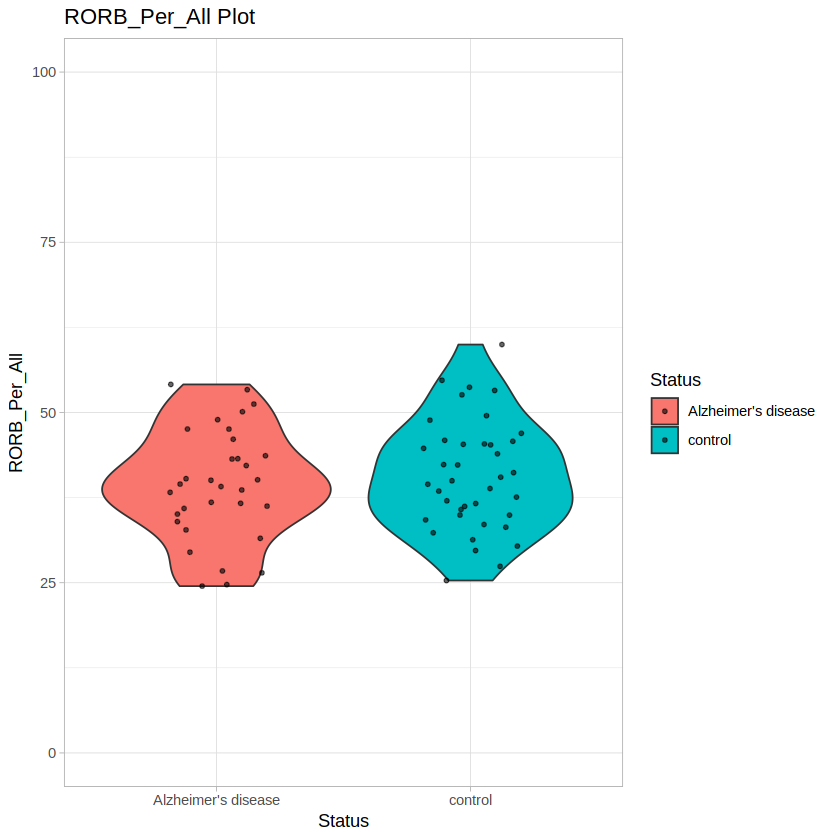

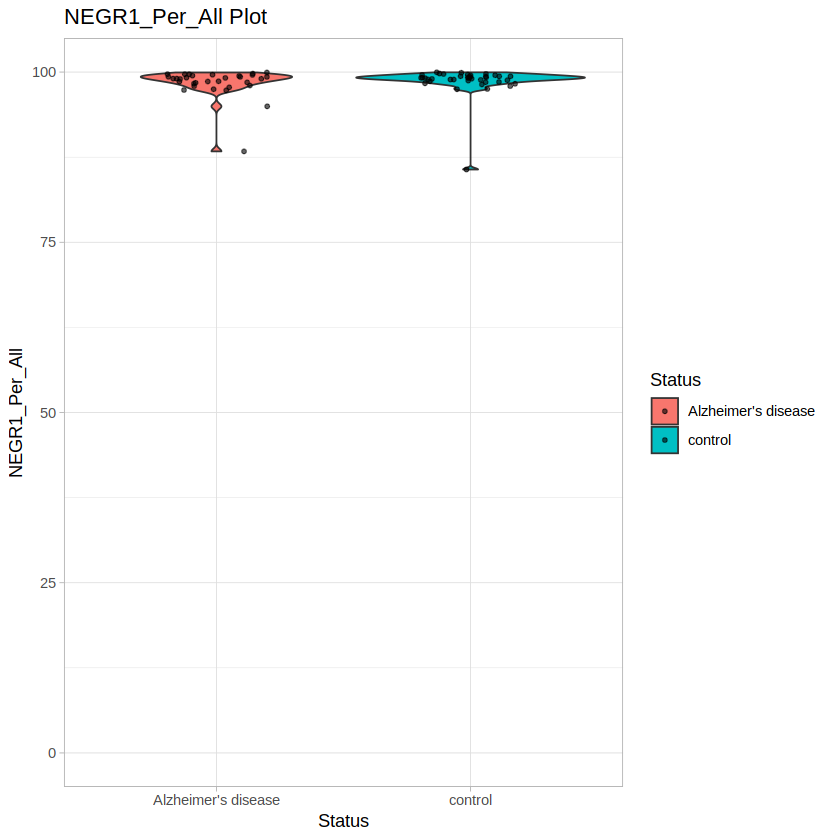

Warning message:
“Removed 19 rows containing missing values or values outside the scale range
(`geom_point()`).”


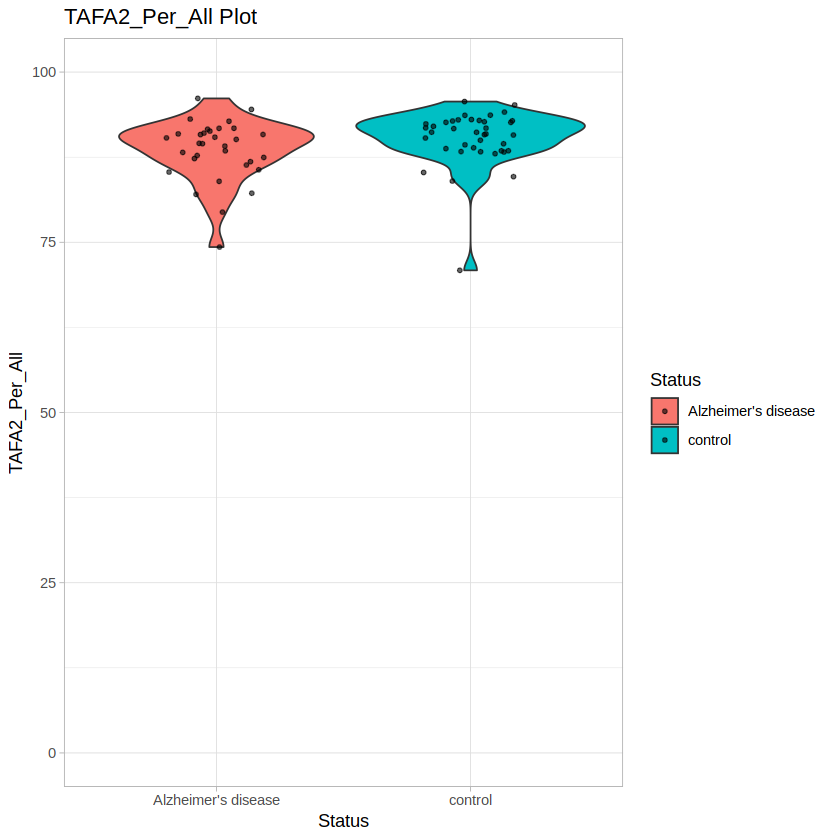

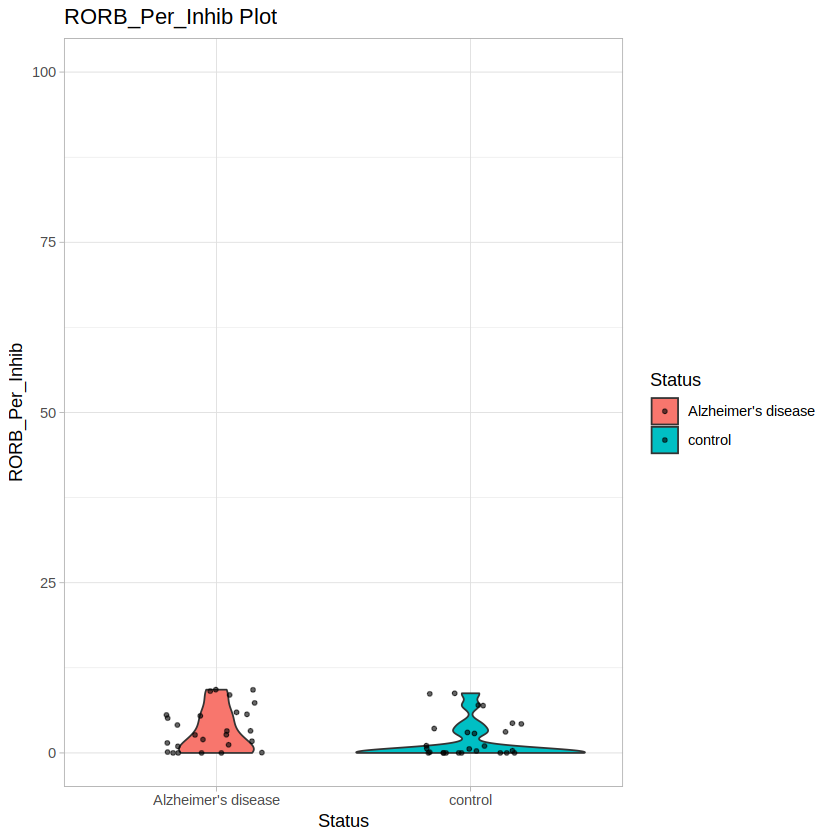

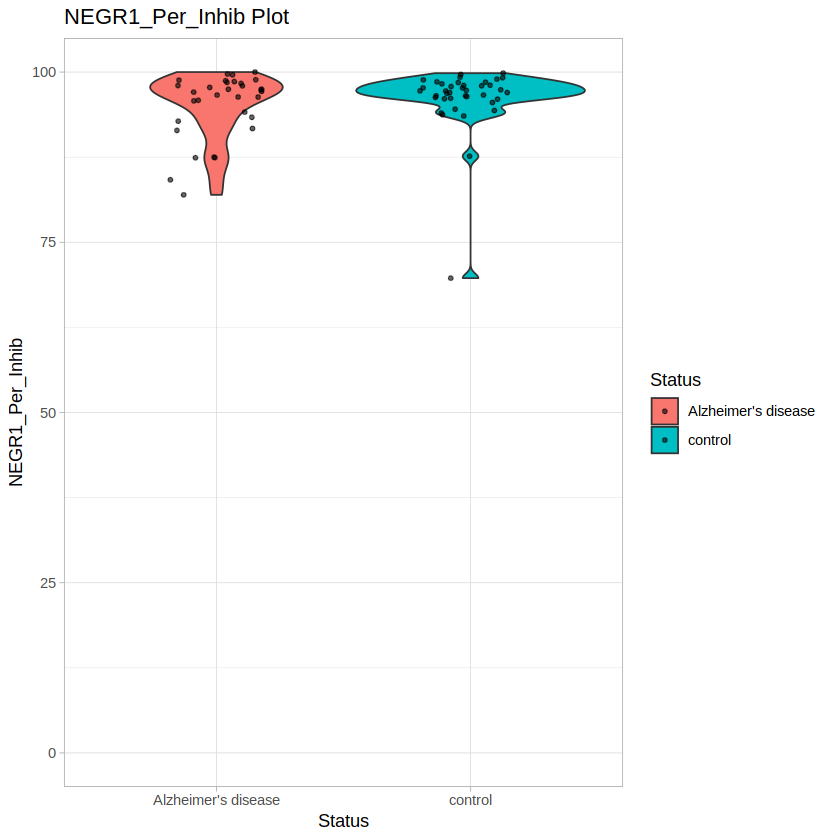

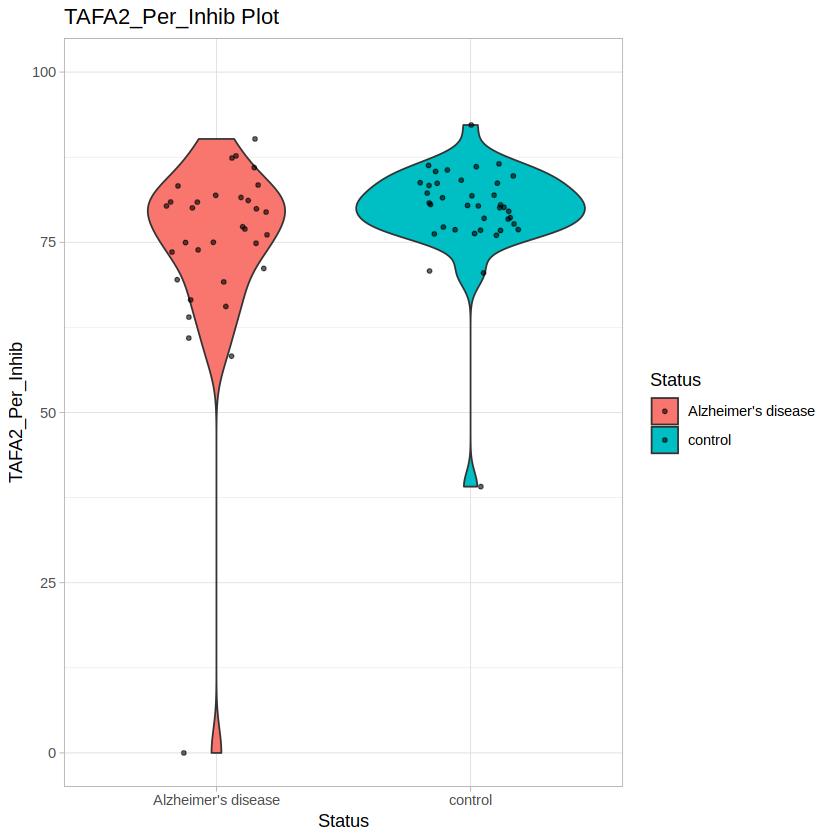

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


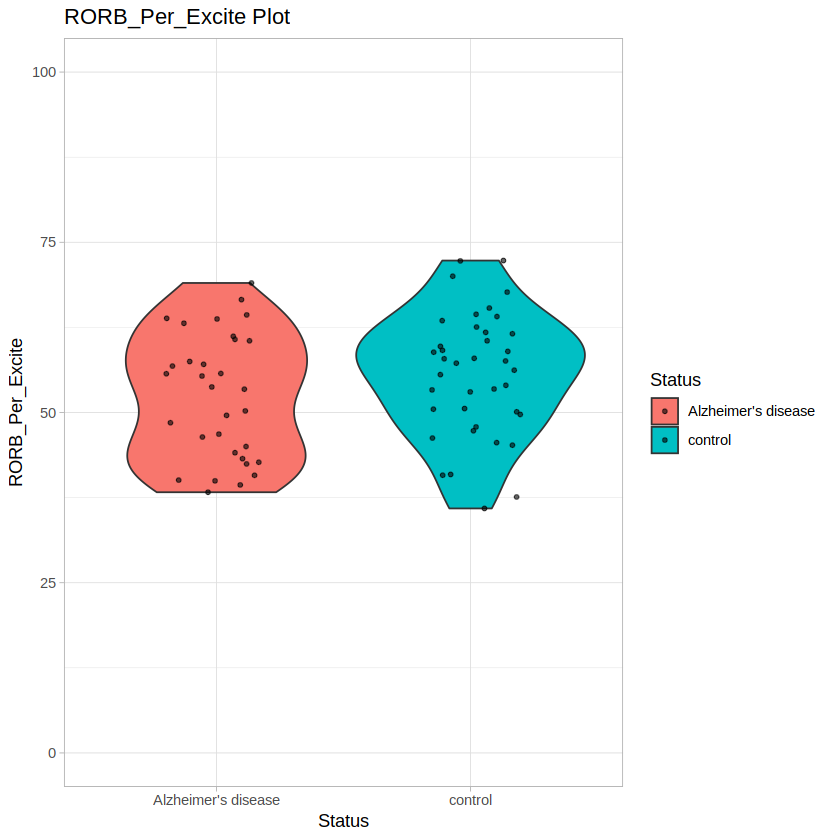

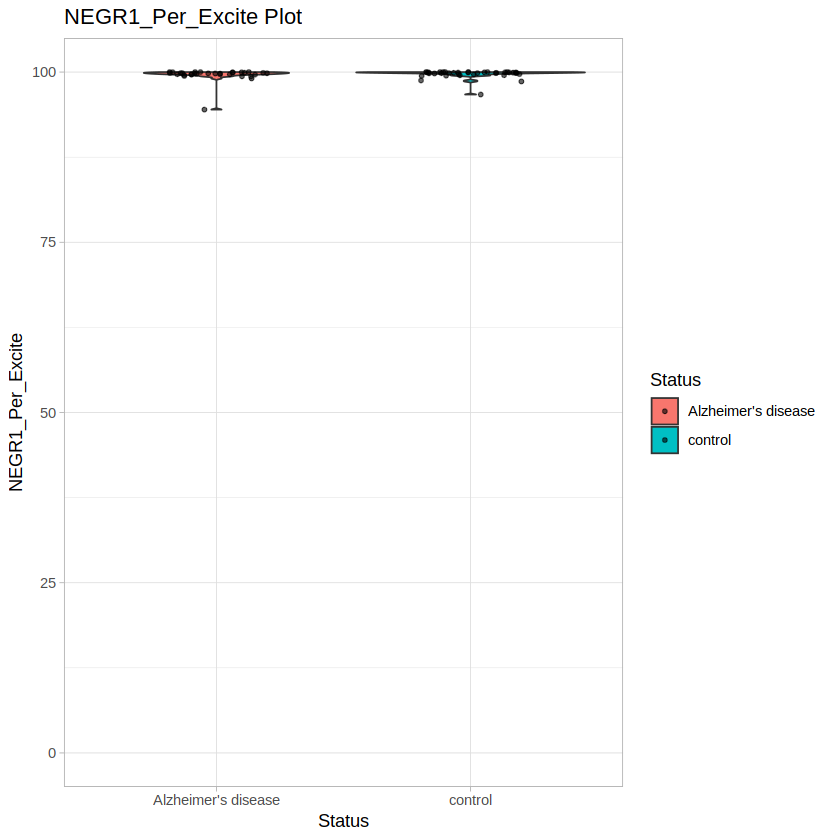

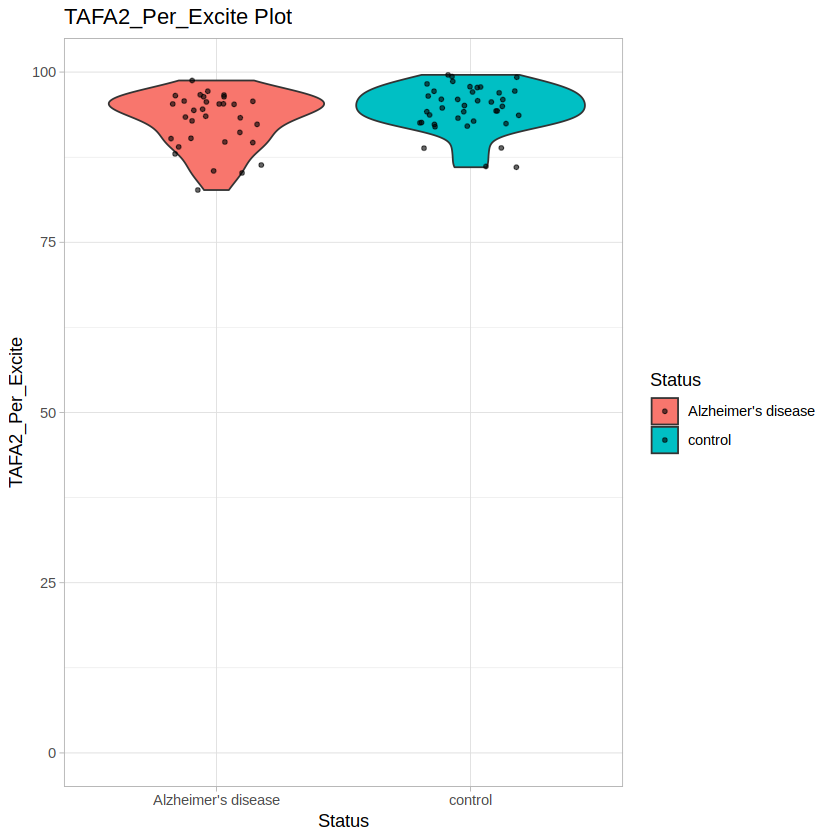

In [7]:
## Violin Plot Loop
for (group in groups) {
  p <- ggplot(data = unique_data, aes(x = Status, y = get(group), fill = Status)) + 
    geom_violin(trim = TRUE) + 
    geom_jitter(width = 0.2, alpha = 0.6, size = 1, color = "black") +
    labs(title = paste(group, "Plot"),  
         x = "Status",
         y = group) + 
    scale_y_continuous(limits = c(0, 100)) +
    theme_light()
  
  print(p)
}

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



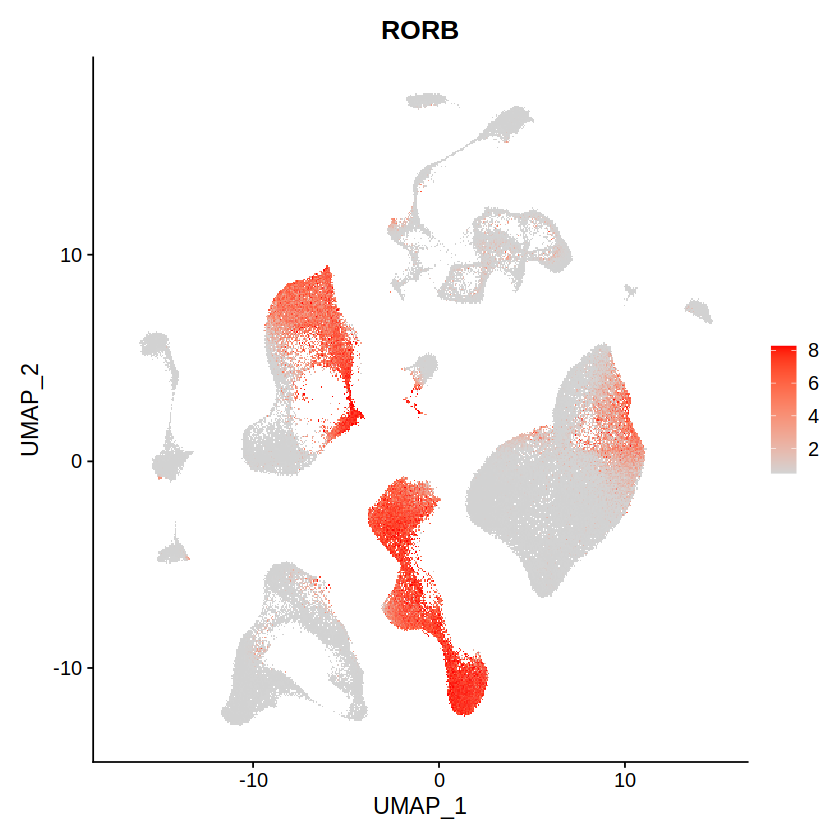

In [50]:
# Set the color range to focus on the upper range of expression values
FeaturePlot(obj, features = "RORB", reduction = "umap", 
            min.cutoff = "q10", max.cutoff = "q90", 
            cols = c("lightgray", "red"))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



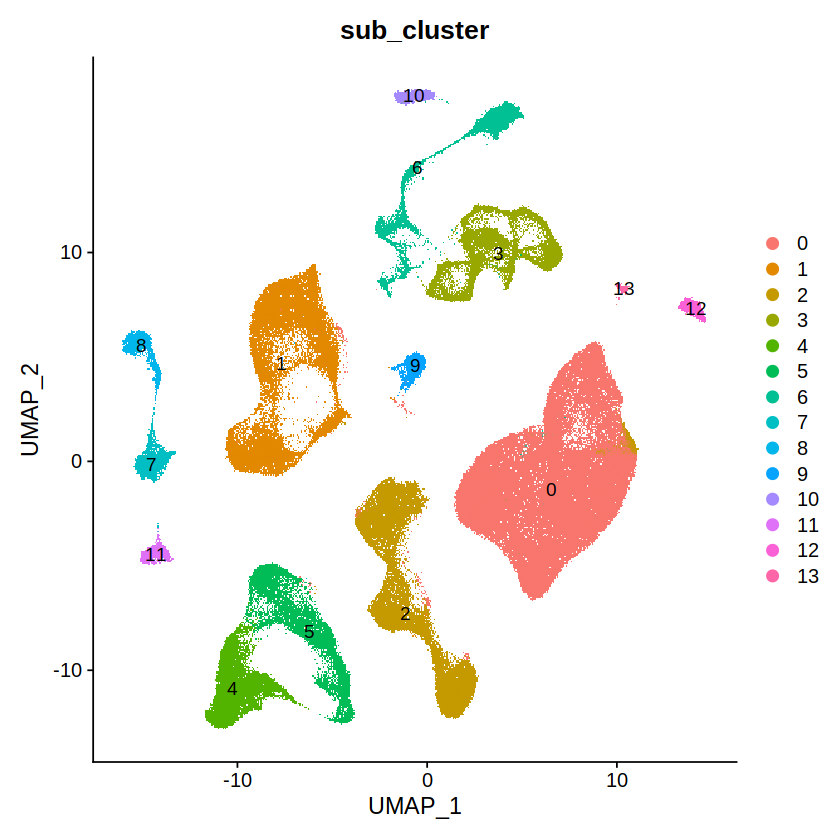

In [49]:
# Visualizing the sub-clusters on UMAP
DimPlot(obj, reduction = "umap", group.by = "sub_cluster", label = TRUE)


In [29]:
# Defining disease groups
disease_groups <- c("Alzheimer's disease")

In [30]:
# Defining gene names
genes <- c("RORB", "NEGR1", "TAFA2")

In [31]:
# Defining cell states
states <- c("All", "Inhib", "Excite")

In [32]:
## T-tests
run_t_test <- function(unique_data, genes, states, disease_groups) {
  # Create empty data frame to store results
  t_test_results <- data.frame(
    Gene = character(),
    Cell_State = character(),
    Disease_Group_Comparison = character(),
    t_statistic = numeric(),
    df = numeric(),
    p_value = numeric(),
    stringsAsFactors = FALSE
  )
  
  # Loop through each gene and each cell state
  for (gene in genes) {
    for (state in states) {
      
      # Define the control and disease-specific columns dynamically
      control_col <- paste0(gene, "_Per_", state)
      control_data <- unique_data[[control_col]][unique_data$Status == "control"]
      
      # Pull out data for each disease group
      disease_data <- lapply(disease_groups, function(status) {
        unique_data[[paste0(gene, "_Per_", state)]][unique_data$Status == status]
      })
      
      # Perform T-test for each disease group against the control
      for (i in seq_along(disease_groups)) {
        group_data <- disease_data[[i]]
        group_name <- disease_groups[i]
        
        # Perform the t-test
        t_test <- t.test(control_data, group_data)
        
        # Store the results in the results data frame
        t_test_results <- rbind(t_test_results, data.frame(
          Gene = gene,
          Cell_State = state,
          Disease_Group_Comparison = paste("Control vs", group_name),
          t_statistic = t_test$statistic,
          df = t_test$parameter,
          p_value = t_test$p.value
        ))
      }
    }
  }
  
  # Return the results data frame
  return(t_test_results)
}


In [33]:
# Run function
t_test_results <- run_t_test(unique_data, genes, states, disease_groups)

In [34]:
t_test_results

,Gene,Cell_State,Disease_Group_Comparison,t_statistic,df,p_value
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
t,RORB,All,Control vs Alzheimer's disease,0.7459931,66.15745,0.45831417
t1,RORB,Inhib,Control vs Alzheimer's disease,-2.1518089,58.65950,0.03554015
t2,RORB,Excite,Control vs Alzheimer's disease,1.4675974,66.05389,0.14695928
t3,NEGR1,All,Control vs Alzheimer's disease,0.5157040,67.58493,0.60774415
t4,NEGR1,Inhib,Control vs Alzheimer's disease,0.9029400,66.94792,0.36979517
t5,NEGR1,Excite,Control vs Alzheimer's disease,0.6419588,48.92251,0.52389674
t6,TAFA2,All,Control vs Alzheimer's disease,1.7440227,64.24694,0.08593801
t7,TAFA2,Inhib,Control vs Alzheimer's disease,1.7840530,43.86413,0.08133360
t8,TAFA2,Excite,Control vs Alzheimer's disease,2.1096479,59.65754,0.03909319


In [111]:
## Chi-squared Analysis

# Grabbing Values from each column
chi_data <- select(obj@meta.data, Sample_ID, Age_of_death, Status, NeuronType, sub_cluster, 
                   RORB_Exp_All, NEGR1_Exp_All, TAFA2_Exp_All, 
                   RORB_Exp_Inhib, NEGR1_Exp_Inhib, TAFA2_Exp_Inhib, 
                   RORB_Exp_Excite, NEGR1_Exp_Excite, TAFA2_Exp_Excite)

In [112]:
# Expression Data
exp_columns <- c("RORB_Exp_All", "NEGR1_Exp_All", "TAFA2_Exp_All", 
                 "RORB_Exp_Inhib", "NEGR1_Exp_Inhib", "TAFA2_Exp_Inhib", 
                 "RORB_Exp_Excite", "NEGR1_Exp_Excite", "TAFA2_Exp_Excite")

In [113]:
# Disease groups
disease_groups <- "Alzheimer's disease"

In [114]:
# Define the function to run the Chi-squared test for Neuro_CO vs other disease groups
run_chi_squared_test <- function(chi_data, exp_columns, disease_groups) {
  
  # Initialize an empty data frame to store results
  chi_results <- data.frame(
    Expression = character(),  
    Disease_Group_Comparison = character(),  # Store the comparison groups
    Chi_squared = numeric(),   
    df = numeric(),            
    p_value = numeric(),       
    stringsAsFactors = FALSE
  )
  
  # Loop through each expression column and run the Chi-squared test
  for (col in exp_columns) {
    
    # Loop through each disease group and compare with "Neuro_CO"
    for (group in disease_groups) {
      
      # Subset the data for "Neuro_CO" and the current disease group
      subset_data <- chi_data[chi_data$Status %in% c("control", group), ]
      
      # Create chi table
      chi_table <- table(subset_data[[col]], subset_data$Status)
      
      # Format Table 
      chi_table <- chi_table[c("Yes", "No"), c("control", group)]
      
      # Print Table 
      print(chi_table)
      
      # Run the Chi-squared test
      chi_res <- chisq.test(chi_table)
      
      # Store the results in the results data frame
      chi_results <- rbind(chi_results, data.frame(
        Expression = col,
        Disease_Group_Comparison = paste("Control vs", group),
        Chi_squared = chi_res$statistic,
        df = chi_res$parameter,
        p_value = chi_res$p.value
      ))
    }
  }
  
  # Return the results data frame
  return(chi_results)
}


In [115]:
# Run function
chi_results <- run_chi_squared_test(chi_data, exp_columns, disease_groups)

     
      control Alzheimer's disease
  Yes   42749               27791
  No    63683               38300
     
      control Alzheimer's disease
  Yes  105212               65418
  No     1220                 673
     
      control Alzheimer's disease
  Yes   96738               59453
  No     9694                6638
     
      control Alzheimer's disease
  Yes     398                 446
  No    29736               16969
     
      control Alzheimer's disease
  Yes   29079               16854
  No     1055                 561
     
      control Alzheimer's disease
  Yes   24078               13694
  No     6056                3721
     
      control Alzheimer's disease
  Yes   42351               27345
  No    33947               21331
     
      control Alzheimer's disease
  Yes   76133               48564
  No      165                 112
     
      control Alzheimer's disease
  Yes   72660               45759
  No     3638                2917


In [116]:
chi_results

,Expression,Disease_Group_Comparison,Chi_squared,df,p_value
,<chr>,<chr>,<dbl>,<int>,<dbl>
X-squared,RORB_Exp_All,Control vs Alzheimer's disease,59.8020444,1,1.048943e-14
X-squared1,NEGR1_Exp_All,Control vs Alzheimer's disease,6.0362715,1,1.401485e-02
X-squared2,TAFA2_Exp_All,Control vs Alzheimer's disease,41.5312006,1,1.160047e-10
X-squared3,RORB_Exp_Inhib,Control vs Alzheimer's disease,96.6609561,1,8.227583e-23
X-squared4,NEGR1_Exp_Inhib,Control vs Alzheimer's disease,2.5448082,1,1.106573e-01
X-squared5,TAFA2_Exp_Inhib,Control vs Alzheimer's disease,10.8160652,1,1.006231e-03
X-squared6,RORB_Exp_Excite,Control vs Alzheimer's disease,5.3845766,1,2.031552e-02
X-squared7,NEGR1_Exp_Excite,Control vs Alzheimer's disease,0.1984636,1,6.559639e-01
X-squared8,TAFA2_Exp_Excite,Control vs Alzheimer's disease,89.4140108,1,3.202604e-21


In [117]:
## Fisher Test

# Define the function to run the Chi-squared test for Neuro_CO vs other disease groups
run_fish_test <- function(chi_data, exp_columns, disease_groups) {
  
  # Initialize an empty data frame to store results
  fish_results <- data.frame(
    Expression = character(),  
    Disease_Group_Comparison = character(),  # Store the comparison groups
    Chi_squared = numeric(),   
    df = numeric(),            
    p_value = numeric(),       
    stringsAsFactors = FALSE
  )
  
  # Loop through each expression column and run the Chi-squared test
  for (col in exp_columns) {
    
    # Loop through each disease group and compare with "Neuro_CO"
    for (group in disease_groups) {
      
      # Subset the data for "Neuro_CO" and the current disease group
      subset_data <- chi_data[chi_data$Status %in% c("control", group), ]
      
      # Create chi table
      fish_table <- table(subset_data[[col]], subset_data$Status)
      
      # Format Table 
      fish_table <- fish_table[c("Yes", "No"), c("control", group)]
      
      # Print Table 
      print(fish_table)
      
      # Run the Chi-squared test
      fish_res <- fisher.test(fish_table)
      
      # Store the results in the results data frame
      fish_results <- rbind(fish_results, data.frame(
        Expression = col,
        Disease_Group_Comparison = paste("Control vs", group),
        P_Value = fish_res$p.value,
        Odds_Ratio = fish_res$estimate,
        Null_Odds_Ratio = fish_res$null.value
      ))
    }
  }
  
  # Return the results data frame
  return(fish_results)
}

In [118]:
# Run function
fish_results <- run_fish_test(chi_data, exp_columns, disease_groups)

     
      control Alzheimer's disease
  Yes   42749               27791
  No    63683               38300
     
      control Alzheimer's disease
  Yes  105212               65418
  No     1220                 673
     
      control Alzheimer's disease
  Yes   96738               59453
  No     9694                6638
     
      control Alzheimer's disease
  Yes     398                 446
  No    29736               16969
     
      control Alzheimer's disease
  Yes   29079               16854
  No     1055                 561
     
      control Alzheimer's disease
  Yes   24078               13694
  No     6056                3721
     
      control Alzheimer's disease
  Yes   42351               27345
  No    33947               21331
     
      control Alzheimer's disease
  Yes   76133               48564
  No      165                 112
     
      control Alzheimer's disease
  Yes   72660               45759
  No     3638                2917


In [119]:
fish_results

,Expression,Disease_Group_Comparison,P_Value,Odds_Ratio,Null_Odds_Ratio
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
odds ratio,RORB_Exp_All,Control vs Alzheimer's disease,1.061081e-14,0.9251189,1
odds ratio1,NEGR1_Exp_All,Control vs Alzheimer's disease,1.341461e-02,0.8871846,1
odds ratio2,TAFA2_Exp_All,Control vs Alzheimer's disease,1.280735e-10,1.1141823,1
odds ratio3,RORB_Exp_Inhib,Control vs Alzheimer's disease,5.276199e-22,0.5092337,1
odds ratio4,NEGR1_Exp_Inhib,Control vs Alzheimer's disease,1.090705e-01,0.9174507,1
odds ratio5,TAFA2_Exp_Inhib,Control vs Alzheimer's disease,1.017105e-03,1.0803456,1
odds ratio6,RORB_Exp_Excite,Control vs Alzheimer's disease,2.011087e-02,0.9731778,1
odds ratio7,NEGR1_Exp_Excite,Control vs Alzheimer's disease,6.219987e-01,1.0641238,1
odds ratio8,TAFA2_Exp_Excite,Control vs Alzheimer's disease,5.316299e-21,1.2731675,1


In [120]:
## Chi-squared: Cell State RORB

# Grabbing Values from each column
chi_data_state <- obj@meta.data %>%
  filter(sub_cluster %in% c('1', '2')) %>%
  select(Sample_ID, Status, sub_cluster, RORB_Exp_All)

In [121]:
# Cell States
states <- c("1", "2")

In [122]:
# Define the function to run the Chi-squared test for Neuro_CO vs other disease groups
run_chi_squared_test <- function(chi_data_state, states, disease_groups) {
  
  # Initialize an empty data frame to store results
  chi_results_state <- data.frame(
    Cell_State = character(),  
    Disease_Group_Comparison = character(),  # Store the comparison groups
    Chi_squared = numeric(),   
    df = numeric(),            
    p_value = numeric(),       
    stringsAsFactors = FALSE
  )
  
  # Loop through each state (seurat_cluster 0 and 1)
  for (state in states) {
    
    # Loop through each disease group and compare with "Neuro_CO"
    for (group in disease_groups) {
      
      # Subset the data for "Neuro_CO" and the current disease group for the current state
      subset_data <- chi_data_state %>%
        filter(Status %in% c("control", group) & sub_cluster == state)
      
      # Create chi table
      chi_table <- table(subset_data$RORB_Exp_All, subset_data$Status)
      
      # Format Table 
      chi_table <- chi_table[c("Yes", "No"), c("control", group)]
      
      # Print Table 
      print(chi_table)
      
      # Run the Chi-squared test
      chi_res <- chisq.test(chi_table)
      
      # Store the results in the results data frame
      chi_results_state <- rbind(chi_results_state, data.frame(
        Cell_State = state,
        Disease_Group_Comparison = paste("control vs", group),
        Chi_squared = chi_res$statistic,
        df = chi_res$parameter,
        p_value = chi_res$p.value
      ))
    }
  }
  
  # Return the results data frame
  return(chi_results_state)
}


In [123]:
# Run function
chi_results_state <- run_chi_squared_test(chi_data_state, states, disease_groups)

     
      control Alzheimer's disease
  Yes   11298                9047
  No     2561                2540
     
      control Alzheimer's disease
  Yes   13969                9378
  No       65                  55


In [124]:
chi_results_state

,Cell_State,Disease_Group_Comparison,Chi_squared,df,p_value
,<chr>,<chr>,<dbl>,<int>,<dbl>
X-squared,1,control vs Alzheimer's disease,46.437396,1,9.459284e-12
X-squared1,2,control vs Alzheimer's disease,1.367094,1,2.423118e-01


In [125]:
## Fisher: Cell State RORB

# Grabbing Values from each column
fish_data_state <- obj@meta.data %>%
  filter(sub_cluster %in% c('1', '2')) %>%
  select(Sample_ID, Status, sub_cluster, RORB_Exp_All)

In [126]:
# Define the function to run the Chi-squared test for Neuro_CO vs other disease groups
run_fish_test <- function(fish_data_state, states, disease_groups) {
  
  # Initialize an empty data frame to store results
  fish_results_state <- data.frame(
    Cell_State = character(),  
    Disease_Group_Comparison = character(),  # Store the comparison groups
    P_Values = numeric(),   
    Odds_Ratio = numeric(),            
    Null_Odds_Ratio = numeric(),       
    stringsAsFactors = FALSE
  )
  
  # Loop through each state (seurat_cluster 0 and 1)
  for (state in states) {
    
    # Loop through each disease group and compare with "Neuro_CO"
    for (group in disease_groups) {
      
      # Subset the data for "Neuro_CO" and the current disease group for the current state
      subset_data <- fish_data_state %>%
        filter(Status %in% c("control", group) & sub_cluster == state)
      
      # Create chi table
      fish_table <- table(subset_data$RORB_Exp_All, subset_data$Status)
      
      # Format Table 
      fish_table <- fish_table[c("Yes", "No"), c("control", group)]
      
      # Print Table 
      print(fish_table)
      
      # Run the Chi-squared test
      fish_res <- fisher.test(fish_table)
      
      # Store the results in the results data frame
      fish_results_state <- rbind(fish_results_state, data.frame(
        Cell_State = state,
        Disease_Group_Comparison = paste("Control vs", group),
        P_Value = fish_res$p.value,
        Odds_Ratio = fish_res$estimate,
        Null_Odds_Ratio = fish_res$null.value
      ))
    }
  }
  
  # Return the results data frame
  return(fish_results_state)
}

In [127]:
# Run function
fish_results_state <- run_fish_test(fish_data_state, states, disease_groups)

     
      control Alzheimer's disease
  Yes   11298                9047
  No     2561                2540
     
      control Alzheimer's disease
  Yes   13969                9378
  No       65                  55


In [128]:
fish_results_state

,Cell_State,Disease_Group_Comparison,P_Value,Odds_Ratio,Null_Odds_Ratio
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
odds ratio,1,Control vs Alzheimer's disease,9.718552e-12,1.238553,1
odds ratio1,2,Control vs Alzheimer's disease,2.250740e-01,1.260363,1


In [129]:
## Linear Model

# Create an empty list to store data frames
model_results <- list()

In [130]:
# Loop through disease groups ("Neuro_AD", "Neuro_CO", etc.)
for (group in disease_groups) {
  # Loop throught cell states (0, 1)
  for (state in states) {
    # Create the variable name for data storage
    var_name <- paste(group, state, sep = "_")
    
    # Filter data and prepare the dataset for modeling
    df <- chi_data %>% 
      filter(sub_cluster == state) %>%  # Filter by cell state (0 or 1)
      filter(Status %in% c(group, "control")) %>%  # Keep only rows for current disease group and control
      select(RORB_Exp_All, Status, Age_of_death) %>%  # Select relevant columns
      mutate(
        RORB_Exp_All = ifelse(RORB_Exp_All == "Yes", 1, 0),  # Convert RORB expression to binary (1 for "Yes", 0 for "No")
        Age_of_death = scale(as.numeric(as.character(Age_of_death)))[, 1],  # Convert AOD to numeric and scale it
        Status = factor(Status, levels = c("control", group))  # Set factor levels for Status
      )
    
    # Logistic regression model to compare the likelihood of RORB expression across groups
    form <- as.formula("RORB_Exp_All ~ Status + Age_of_death")  # RORB expression as a function of disease group and age
    
    # Fit logistic regression model (binomial logistic regression)
    model_summary <- glm(form, data = df, family = binomial(link = "logit"))
    
    # Get the results in a tidy format
    res <- broom::tidy(model_summary)
    
    # Store the model results in a list with the variable name
    model_results[[var_name]] <- res
  }
}

In [131]:
# Loop through all results
for (var_name in names(model_results)) {
  # Get the model results for the current disease group and state
  res <- model_results[[var_name]]
  
  # Apply the Benjamini-Hochberg correction to the p-values
  res$p.adjusted <- p.adjust(res$p.value, method = "BH")
  
  # Optionally, you can store the adjusted results back into the list
  model_results[[var_name]] <- res
}

In [132]:
model_results

term,estimate,std.error,statistic,p.value,p.adjusted
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.48483405,0.02190102,67.7974776,0.000000e+00,0.000000e+00
StatusAlzheimer's disease,-0.21518552,0.03139377,-6.8544022,7.161135e-12,1.074170e-11
Age_of_death,0.01261611,0.01563345,0.8069951,4.196693e-01,4.196693e-01
term,estimate,std.error,statistic,p.value,p.adjusted
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.38031739,0.12537523,42.9137177,0.0000000,0.0000000
StatusAlzheimer's disease,-0.25041376,0.18532156,-1.3512392,0.1766188,0.2649282
Age_of_death,0.07071071,0.09020145,0.7839199,0.4330871,0.4330871
